In [182]:
import numpy as np
import scipy.misc as misc
import scipy.stats as stats
import scipy.linalg as linalg

import os
import sys
import matplotlib.pyplot as plt 
%matplotlib inline
from IPython import display

sys.path.append(os.path.realpath('../dataReader'))
from patchify import patchify

sys.path.append(os.path.expanduser('~/Documents/zhenlinx/code/2017Summer/utils'))
from CORAL import image_adapt

from skimage.measure import compare_ssim 


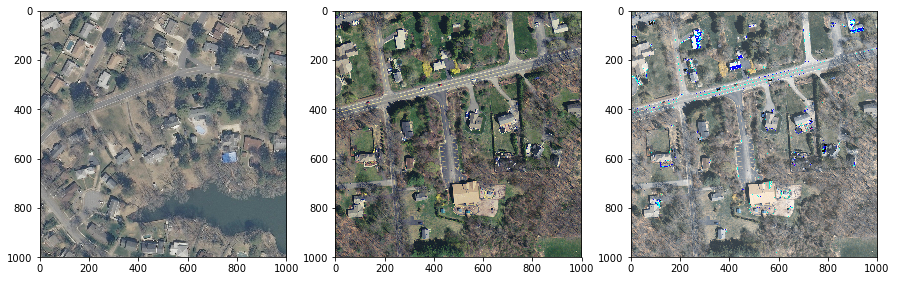

In [184]:
source_city_name = "Seekonk"
target_city_name = "Norfolk"

IMAGE_PATH = os.path.expanduser("~/Documents/data/building")
source_image_file = '{}_{:0>2}'.format(source_city_name, 1)
source_image = misc.imread(os.path.join(IMAGE_PATH, source_city_name, "{}_RGB.png".format(source_image_file)))
source_truth = (misc.imread(os.path.join(IMAGE_PATH, source_city_name, "{}_truth.png".format(source_image_file))) / 255).astype(np.uint8)

target_image_file = '{}_{:0>2}'.format(target_city_name, 1)
target_image = misc.imread(os.path.join(IMAGE_PATH, target_city_name, "{}_RGB.png".format(target_image_file)))
target_truth = (misc.imread(os.path.join(IMAGE_PATH, target_city_name, "{}_truth.png".format(target_image_file))) / 255).astype(np.uint8)

LAMBA = 1
source_image_adapted = image_adapt(source_image, target_image, LAMBA)

# print(compare_ssim(source_image, target_image, multichannel=True))
# print(compare_ssim(source_image_adapted, target_image, multichannel=True))

# plt.figure(figsize=(15,5))
# plt.subplot(1,3,1)
# plt.imshow(target_image)
# plt.subplot(1,3,2)
# plt.imshow(source_image)

# plt.subplot(1,3,3)
# plt.imshow(source_image_adapted)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(target_image[-1000:-1,-1000:-1,:] )
plt.subplot(1,3,2)
plt.imshow(source_image[-1000:-1,-1000:-1,:] )
plt.subplot(1,3,3)
plt.imshow(source_image_adapted[-1000:-1,-1000:-1,:])

In [155]:
# Read all image data

city_list = ['Norfolk', 'Arlington', 'Atlanta', 'Austin', 'Seekonk', 'NewHaven']
source_image_adapted={}
source_image={}
target_image={}

for i, source_city_name in enumerate(city_list):
    IMAGE_PATH = os.path.expanduser("~/Documents/data/building")
    source_image_file = '{}_{:0>2}'.format(source_city_name, 3 if source_city_name!='NewHaven' else 2)
    source_image[source_image_file] = misc.imread(os.path.join(IMAGE_PATH, source_city_name, "{}_RGB.png".format(source_image_file)))
#     source_truth = (misc.imread(os.path.join(IMAGE_PATH, source_city_name, "{}_truth.png".format(source_image_file))) / 255).astype(np.uint8)
    
for j, target_city_name in enumerate(city_list):
        target_image_file = '{}_{:0>2}'.format(target_city_name, 1)
        target_image[target_image_file] = misc.imread(os.path.join(IMAGE_PATH, target_city_name, "{}_RGB.png".format(target_image_file)))
#         target_truth = (misc.imread(os.path.join(IMAGE_PATH, target_city_name, "{}_truth.png".format(target_image_file))) / 255).astype(np.uint8)        
        

In [156]:
for source_city_name in city_list:
    source_image_file = '{}_{:0>2}'.format(source_city_name, 3 if source_city_name!='NewHaven' else 2)       
    for j, target_city_name in enumerate(city_list):
        target_image_file = '{}_{:0>2}'.format(target_city_name, 1)
        source_image_adapted["{}_to_{}".format(source_image_file, target_image_file)] = image_adapt(source_image[source_image_file], target_image[target_image_file], 1)
        

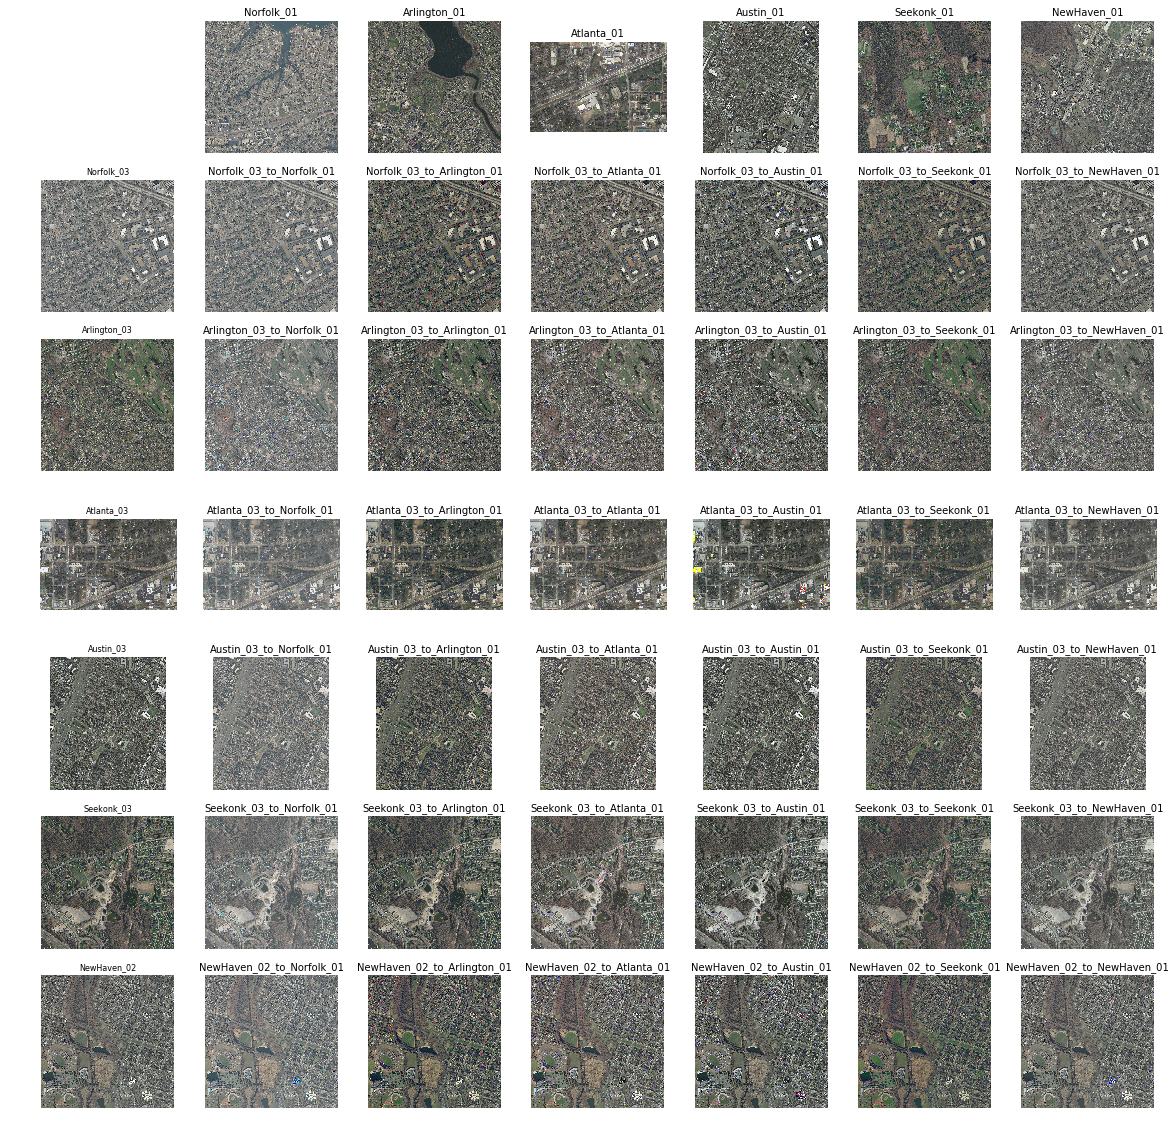

In [171]:
f, axes = plt.subplots(7, 7, figsize=(20, 20))
axes[0,0].set_axis_off()
for i, source_city_name in enumerate(city_list):
    source_image_file = '{}_{:0>2}'.format(source_city_name, 3 if source_city_name!='NewHaven' else 2)       
    axes[i+1,0].imshow(source_image[source_image_file])
    axes[i+1,0].set_title(source_image_file, fontsize=8)
    axes[i+1,0].set_axis_off()
    display.display(plt.gcf())
    display.clear_output(wait=True)

#     display.display(axes[i+1,0])
    for j, target_city_name in enumerate(city_list):
        target_image_file = '{}_{:0>2}'.format(target_city_name, 1)        
        if i == 0:
            axes[0,j+1].imshow(target_image[target_image_file])
            axes[0,j+1].set_title(target_image_file, fontsize=10)
            axes[0,j+1].set_axis_off()
            display.display(plt.gcf())
            display.clear_output(wait=True)



        adapted_file = "{}_to_{}".format(source_image_file, target_image_file)
        axes[i+1,j+1].imshow(source_image_adapted[adapted_file])
        axes[i+1,j+1].set_title(adapted_file, fontsize=10)
        axes[i+1,j+1].set_axis_off()
        display.display(plt.gcf())
        display.clear_output(wait=True)




In [ ]:
source_city_name = "Norfolk"
target_city_name = "Atlanta"

IMAGE_PATH = os.path.expanduser("~/Documents/data/building")
source_image_file = '{}_{:0>2}'.format(source_city_name, 2)
source_image = misc.imread(os.path.join(IMAGE_PATH, source_city_name, "{}_RGB.png".format(source_image_file)))
source_truth = (misc.imread(os.path.join(IMAGE_PATH, source_city_name, "{}_truth.png".format(source_image_file))) / 255).astype(np.uint8)

target_image_file = '{}_{:0>2}'.format(target_city_name, 1)
target_image = misc.imread(os.path.join(IMAGE_PATH, target_city_name, "{}_RGB.png".format(target_image_file)))
target_truth = (misc.imread(os.path.join(IMAGE_PATH, target_city_name, "{}_truth.png".format(target_image_file))) / 255).astype(np.uint8)


# patch_size = 5
# source_image_patches = patchify(source_image, patch_size, patch_size) 
# target_image_patches = patchify(target_image, patch_size, patch_size) 

# source_patch_vec = np.reshape(source_image_patches, [-1, patch_size*patch_size])
# target_patch_vec = np.reshape(target_image_patches, [-1, patch_size*patch_size])


print(source_patch_vec.shape)
lamda = 1
source_patch_adapted_vec = CORAL(source_patch_vec, target_patch_vec, lamda)

# print(np.cov(source_patch_vec, rowvar=False))
# print(np.cov(target_patch_vec, rowvar=False))
# print(np.cov(source_patch_adapted_vec, rowvar=False))
print(np.mean(source_patch_vec))
print(np.mean(target_patch_vec))
print(np.mean(source_patch_adapted_vec))

# source_image_adapted = np.reshape(source_image_adapted_vec, source_image.shape).astype(np.uint8) 
